<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/principles_of_ai_with_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the embedded dataset
file_path = "/content/codeee_df.csv"  # Replace with the correct file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())
print(data.info())

# Convert the dataset to a numpy array
X = data.values
print("Shape of the embedded data:", X.shape)


   code_embedding_0  code_embedding_1  code_embedding_2  code_embedding_3  \
0          0.078924          0.012509         -0.138667          0.067882   
1          0.043193          0.037376         -0.158593         -0.008594   
2         -0.008276         -0.056081         -0.134458          0.095741   
3          0.050563          0.016524         -0.119723          0.020232   
4          0.019809         -0.012511         -0.141354          0.025681   

   code_embedding_4  code_embedding_5  code_embedding_6  code_embedding_7  \
0          0.006679         -0.038558         -0.049532         -0.025190   
1         -0.026489         -0.064836         -0.061437         -0.055427   
2         -0.034890         -0.021633         -0.034541         -0.066754   
3         -0.069263         -0.017583         -0.027811          0.024095   
4          0.004473         -0.044075         -0.041790         -0.002299   

   code_embedding_8  code_embedding_9  ...  code_embedding_246  \
0       

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters
kmeans_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans_labels
print("Cluster labels added to the data!")
print(data.head())


Cluster labels added to the data!
   code_embedding_0  code_embedding_1  code_embedding_2  code_embedding_3  \
0          0.078924          0.012509         -0.138667          0.067882   
1          0.043193          0.037376         -0.158593         -0.008594   
2         -0.008276         -0.056081         -0.134458          0.095741   
3          0.050563          0.016524         -0.119723          0.020232   
4          0.019809         -0.012511         -0.141354          0.025681   

   code_embedding_4  code_embedding_5  code_embedding_6  code_embedding_7  \
0          0.006679         -0.038558         -0.049532         -0.025190   
1         -0.026489         -0.064836         -0.061437         -0.055427   
2         -0.034890         -0.021633         -0.034541         -0.066754   
3         -0.069263         -0.017583         -0.027811          0.024095   
4          0.004473         -0.044075         -0.041790         -0.002299   

   code_embedding_8  code_embedding_9  .

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
data['DBSCAN_Cluster'] = dbscan_labels
print("DBSCAN cluster labels added to the data!")
print(data.head())


DBSCAN cluster labels added to the data!
   code_embedding_0  code_embedding_1  code_embedding_2  code_embedding_3  \
0          0.078924          0.012509         -0.138667          0.067882   
1          0.043193          0.037376         -0.158593         -0.008594   
2         -0.008276         -0.056081         -0.134458          0.095741   
3          0.050563          0.016524         -0.119723          0.020232   
4          0.019809         -0.012511         -0.141354          0.025681   

   code_embedding_4  code_embedding_5  code_embedding_6  code_embedding_7  \
0          0.006679         -0.038558         -0.049532         -0.025190   
1         -0.026489         -0.064836         -0.061437         -0.055427   
2         -0.034890         -0.021633         -0.034541         -0.066754   
3         -0.069263         -0.017583         -0.027811          0.024095   
4          0.004473         -0.044075         -0.041790         -0.002299   

   code_embedding_8  code_embeddi

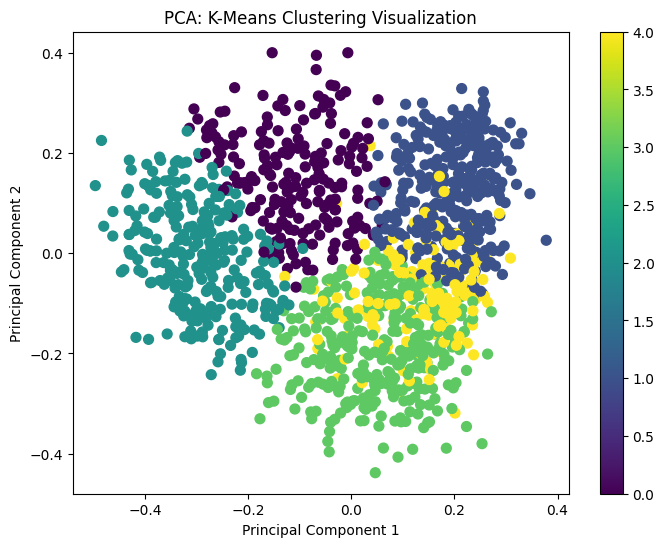

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("PCA: K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


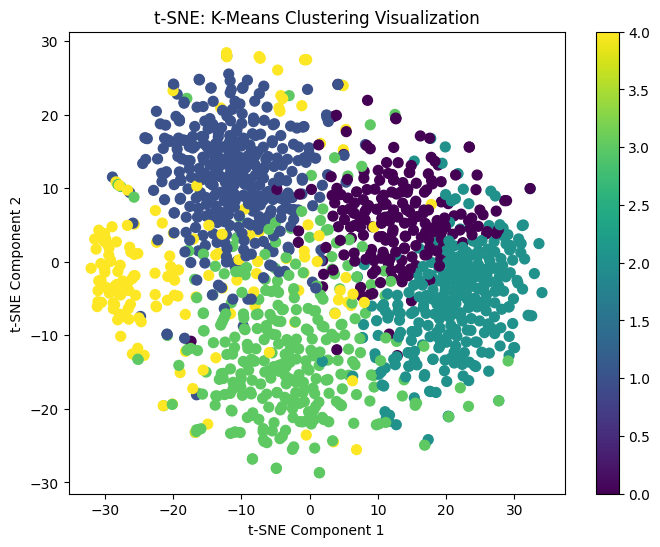

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("t-SNE: K-Means Clustering Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:
import numpy as np

# Generate synthetic labels (e.g., binary classification)
y = np.random.randint(0, 2, size=X.shape[0])  # Binary labels (0 or 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (1055, 256)
Testing Set Shape: (264, 256)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
individual_results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    individual_results[model_name] = accuracy


Training Logistic Regression...
Logistic Regression Accuracy: 51.52%
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       127
           1       0.53      0.59      0.56       137

    accuracy                           0.52       264
   macro avg       0.51      0.51      0.51       264
weighted avg       0.51      0.52      0.51       264

Training Random Forest...
Random Forest Accuracy: 48.48%
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       127
           1       0.50      0.50      0.50       137

    accuracy                           0.48       264
   macro avg       0.48      0.48      0.48       264
weighted avg       0.49      0.48      0.48       264

Training SVM...
SVM Accuracy: 53.03%
              precision    recall  f1-score   support

           0       0.51      0.46      0.49       127
           1       0.54      0.59      0.57       137

    accuracy       

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define stacking classifier
base_models = [
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True))
]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train and evaluate stacking classifier
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")


Stacking Classifier Accuracy: 50.76%


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define voting classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True))
], voting='soft')

# Train and evaluate voting classifier
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%")


Voting Classifier Accuracy: 51.14%


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np


In [ ]:
# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SVM
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}


In [ ]:
logreg = LogisticRegression()
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_params, cv=3, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

print("Best Logistic Regression Parameters:", logreg_grid.best_params_)


Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=3, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

print("Best Random Forest Parameters:", rf_grid.best_params_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
svc = SVC(probability=True)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_params, cv=3, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
svc_best = svc_grid.best_estimator_

print("Best SVM Parameters:", svc_grid.best_params_)


Best SVM Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


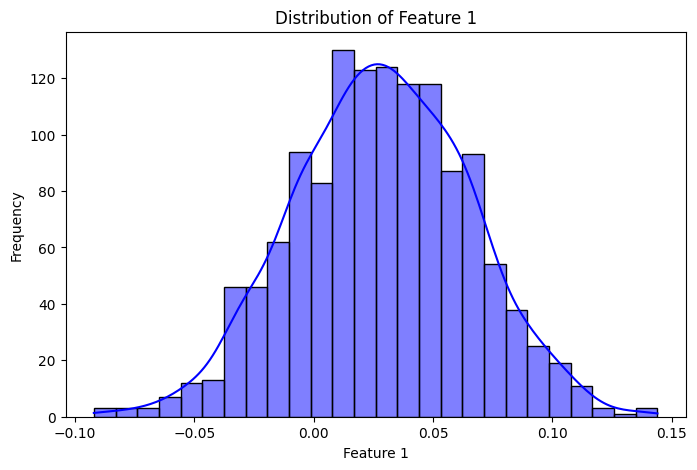

In [ ]:
# Select a feature to visualize
feature_index = 0  # Change index to visualize different features

plt.figure(figsize=(8, 5))
sns.histplot(df[f"Feature {feature_index+1}"], kde=True, color="blue")
plt.title(f"Distribution of Feature {feature_index+1}")
plt.xlabel(f"Feature {feature_index+1}")
plt.ylabel("Frequency")
plt.show()


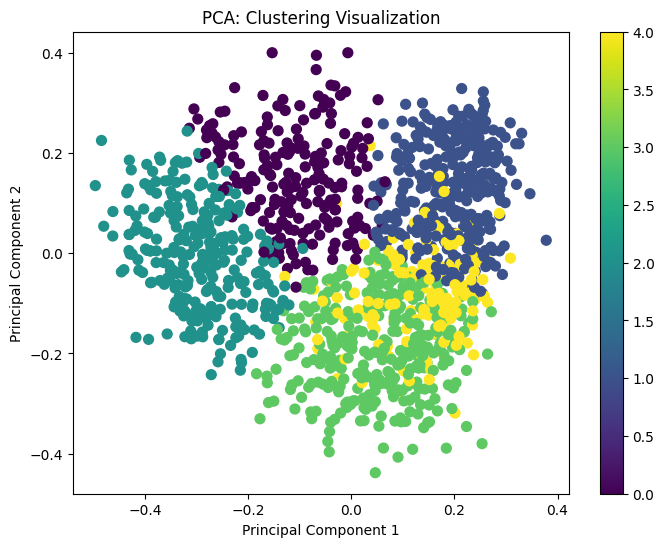

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results with K-Means cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("PCA: Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


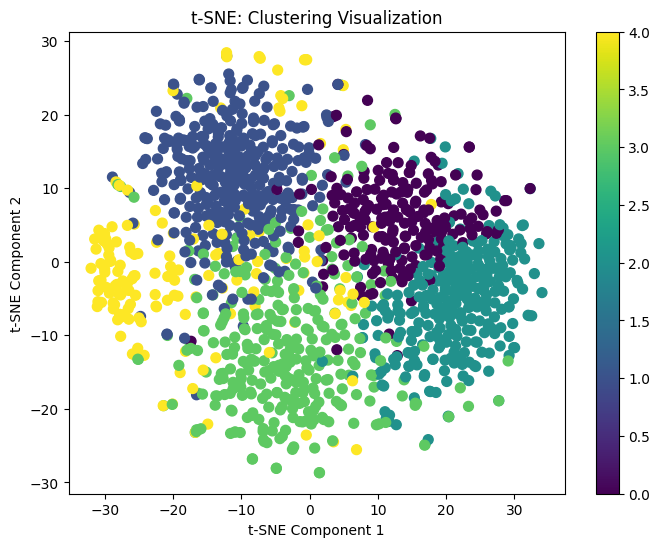

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE results with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.colorbar()
plt.title("t-SNE: Clustering Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


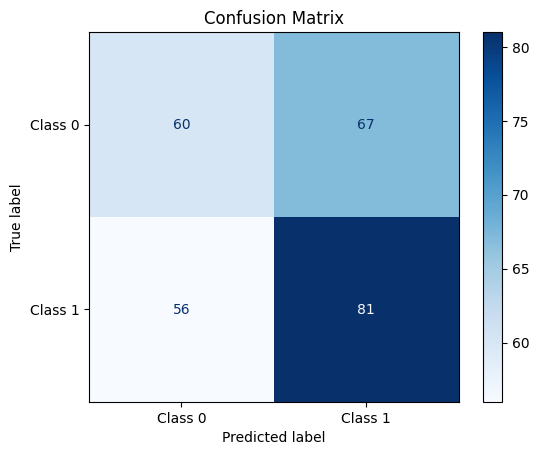

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for a model (e.g., Random Forest)
y_pred_rf = rf_best.predict(X_test)  # Replace with the model you want to analyze
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


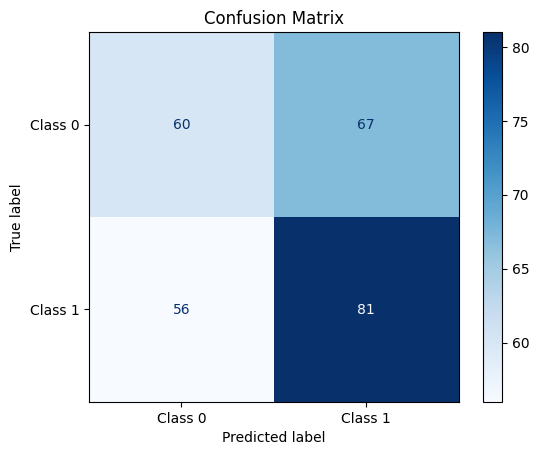

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for a model (e.g., Random Forest)
y_pred_rf = rf_best.predict(X_test)  # Replace with the model you want to analyze
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
